In [1]:
import student as s
import stats
import matplotlib.pyplot as plt

In [2]:
# get student data from files
classes = {}
for year in range(2007,2017):
    classes[year] = s.import_safe_file("assets/students-"+str(year)+".xlsx")
    
classes_repeating = {}
for year in range(2008,2017):
    classes_repeating[year] = s.find_repeating(classes[year],classes[year-1])

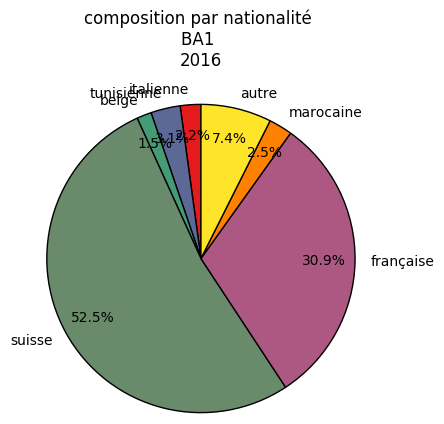

In [12]:
stats.plot_nationality(classes[2016],"composition par nationalité \nBA1 \n2016")

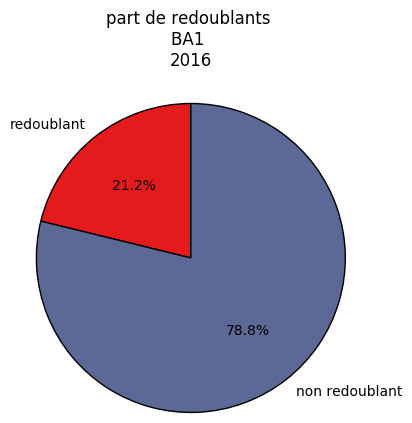

In [13]:
stats.plot_repeating(classes[2016],classes_repeating[2016],"part de redoublants \nBA1 \n2016")

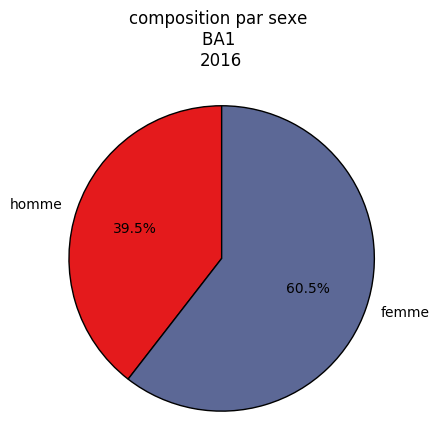

In [14]:
stats.plot_sex(classes[2016],"composition par sexe \nBA1 \n2016")

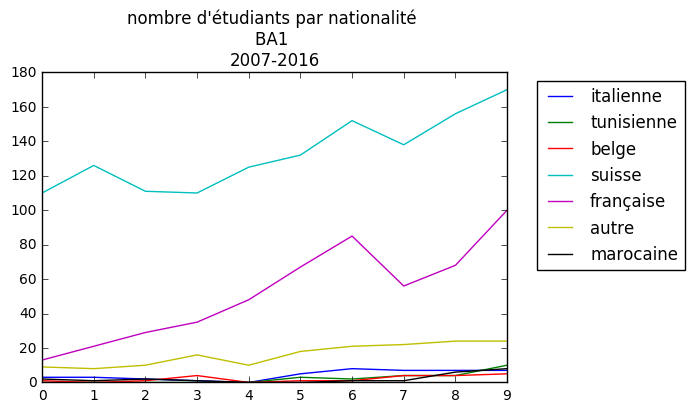

In [15]:
stats.plot_nationalities_by_year(classes,"nombre d'étudiants par nationalité \nBA1 \n2007-2016")